# NetworkX
#### Network Analysis in Python

This notebook provides a general introduction to NetworkX, a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex graphs and networks.

**Source:** Visit [networkx.org](networkx.org) for more info.
**Current Version:** ```v3.1```

**Notes:**
* We will be using this current version ```v3.1``` throughout this tutorial.
* Click [here](https://networkx.org/documentation/stable/) for a documentation of this version.
* Note that there will be some slight differences depending on the NetworkX version you are using so it is important to know which current version you are using to know the suitable documentation.

## Installation

One can install NetworkX manually from [https://pypi.python.org/pypi/networkx](https://pypi.python.org/pypi/networkx). Other ways to install include:

```$ pip install networkx```

## Basic Example

Once installed, import ```networkx``` as follows:

In [2]:
import networkx as nx

And then we can proceed with a basic example of its usage. 

In [3]:
G = nx.Graph()      # creates a graph
G.add_node('donut') # creates a new node in the graph called 'donut'
G.add_edge(3,4)     # creates an edge in the graph (3,4) while simultaneously creating these new nodes
print(G.nodes())    # prints list of nodes in G
print(G.edges())    # prints list of edges in G

['donut', 3, 4]
[(3, 4)]


## Graph Types

* **Graph:** undirected simple (allows self-loops)
* **DiGraph:** directed simple (allows self-loops)
* **MultiGraph:** undirected with parallel edges
* **MultiDiGraph:** directed with parallel edges

**Note:** Directed graphs can be converted to undirected using ```G.to_undirected()``` while undirected graphs can be converted to directed using ```G.to_directed()```

In [4]:
g = nx.Graph()
d = nx.DiGraph()
m = nx.MultiGraph()
h = nx.MultiDiGraph()

## Adding Nodes

The method ```add_node()``` allows to add a single node given the argument. Meanwhile, ```add_nodes_from()``` allows to add all nodes given an ```iterable``` argument (e.g., lists, strings -- which are collection of single characters, etc.)

In [5]:
G = nx.Graph()                  # creates a new graph G
G.add_node('m')                 # creates new node 'm' in G
G.add_nodes_from(['n','p'])     # creates new nodes from each item in the list and adds each to G
G.add_nodes_from('abc')         # this time with string instead of list
print(G.nodes())                # check nodes, we should have ['m', 'n', 'p', 'a', 'b', 'c']

G2 = nx.path_graph(5)           # creates path graph consisting of nodes [0, 1, 2, 3, 4]
print(G2.nodes()) 
G.add_nodes_from(G2)            # adds all nodes of G2 to nodes of G
print(G.nodes())                # check nodes, we should have ['m', 'n', 'p', 'a', 'b', 'c', 0, 1, 2, 3, 4]

['m', 'n', 'p', 'a', 'b', 'c']
[0, 1, 2, 3, 4]
['m', 'n', 'p', 'a', 'b', 'c', 0, 1, 2, 3, 4]


## Adding Edges

Methods ```add_edge``` and ```add_edges_from``` work like the methods for adding nodes. Note that by adding an edge consisting of a non-existing node in the graph, then the node will automatically be created.

In [6]:
# create a graph consisting of a list of 2-tuples
# each pair will serve as an edge
G = nx.Graph([('w', 'x'), ('x', 'y'), ('y', 'w')])
print(G.edges())

# adds edge ('w', 'z')
# but notice that 'z' is a non-existing node in G, so it automatically creates node 'z'
G.add_edge('w', 'z')
G.add_edges_from([('z', 'y'), ('z', 'x')])            # adds each edge in the list into G
print(G.edges())                                      # [('w', 'x'), ('w', 'y'), ('w', 'z'), ('x', 'y'), ('x', 'z'), ('y', 'z')]

[('w', 'x'), ('w', 'y'), ('x', 'y')]
[('w', 'x'), ('w', 'y'), ('w', 'z'), ('x', 'y'), ('x', 'z'), ('y', 'z')]


In [7]:
g.add_edge('w', 'z')
g.add_edges_from([('z', 'y'), ('z', 'x')])
print(g.edges())

[('w', 'z'), ('z', 'y'), ('z', 'x')]


## Node Attributes

Each node can have an attribute that you can assign. Then you are also able to easily access them through ```G.nodes[]```.

In [8]:
G = nx.Graph()
G.add_node(1, color='green')               # create new node in G called 1 and give it a color attribute called 'green'
G.add_nodes_from([2,3], color='red')       # create new nodes called 2 and 3 and give both of them the same color attribute called 'red'
print(G.nodes[1])                          # G.nodes[] will return a dictionary where each key is the attribute name and the value is the attribute value for the node
print(G.nodes[1]['color'])                 # since G.nodes[1] returns a dict, then this returns the color attribute of node 1
print(G.nodes[2]['color'])
print(G.nodes[3]['color'])

{'color': 'green'}
green
red
red


Use ```nx.set_node_attributes``` to add more attributes (and values) down the line. Note that you can also modify the existing attribute value if you wish.

In [9]:
# you can continue to add attributes and values later on or even modify their previous value
G.nodes[3]['color'] = 'blue'
nx.set_node_attributes(G, 0.5, 'weight')  
print(G.nodes[1])
print(G.nodes[2])
print(G.nodes[3])

{'color': 'green', 'weight': 0.5}
{'color': 'red', 'weight': 0.5}
{'color': 'blue', 'weight': 0.5}


In [10]:
# here, you can also use a dict to specify the attributes
label_dict = dict(zip(range(1,4), range(1,4)))               # creates a dict {1:1, 2:2, 3:3}
nx.set_node_attributes(G, label_dict, 'label') 
print(G.nodes[1])
print(G.nodes[2])
print(G.nodes[3])

{'color': 'green', 'weight': 0.5, 'label': 1}
{'color': 'red', 'weight': 0.5, 'label': 2}
{'color': 'blue', 'weight': 0.5, 'label': 3}


## Edge Attributes

As in node attributes, one can add attributes to edges.

In [11]:
G.add_edge(1, 2, thickness=1.5)
G.add_edges_from([(2,3), (3,4)], thickness=2.0) # attribute applies to each edge in the list
print(G.edges[1,2])
print(G.edges[2,3])
print(G.edges[3,4])
# print(G.edges[1,3])                           # does not work since edge (1,3) does not work
print(G.edges[2,1])                             # G is not directed so this is commutative

{'thickness': 1.5}
{'thickness': 2.0}
{'thickness': 2.0}
{'thickness': 1.5}


In [12]:
G.add_edges_from([(1,2,{'size':15})])           # add a third argument (dict) to specify an edge attribute and its value
G.add_weighted_edges_from([(10,20,4.9)])        # adds third value in tuple as 'weight' attribute

In [13]:
# print each edge of G and their attributes
for e1, e2 in G.edges():
	print('edge (' + str(e1) + ', ' + str(e2) + '): ' + str(G.edges[e1, e2]))

edge (1, 2): {'thickness': 1.5, 'size': 15}
edge (2, 3): {'thickness': 2.0}
edge (3, 4): {'thickness': 2.0}
edge (10, 20): {'weight': 4.9}


Another way to display edge attributes, aside from the ```G.edges[]``` is using ```G.get_edge_data()```.

In [ ]:
G.get_edge_data(1,2)

## Graph Properties

Here are some simple properties:
* The number of nodes in a graph can be accessed using ```len()```, ```number_of_nodes()``` or ```order()```.
* The number of edges can be accessed using ```number_of_edges()```.
* Use ```has_node()``` to check if a graph consists the specified node.
* Use ```has_edge()``` to check if a graph consists the specified edge.

In [14]:
# number of nodes
print('The number of nodes in G:')
print(len(G))
print(G.number_of_nodes())
print(G.order())

# number of edges
print('The number of edges in G:')
print(G.number_of_edges())

# node membership
print('Check node membership in G:')
print(G.has_node(1))

# edge presence
print('Check edge presence in G:')
print(G.has_edge(1, 2))

The number of nodes in G:
6
6
6
The number of edges in G:
4
Check node membership in G:
True
Check edge presence in G:
True


## Node Neighbors

Use list comprehension to list all the neighbors of a node.

In [15]:
G = nx.path_graph(4)              # new Graph (path graph)
print([e for e in G.edges()])     # use list comprehension to list all edges:
print([(n, nbrs) for n,nbrs in G.adjacency()])     # adjacency list

[(0, 1), (1, 2), (2, 3)]
[(0, {1: {}}), (1, {0: {}, 2: {}}), (2, {1: {}, 3: {}}), (3, {2: {}})]


## Node Degrees

A node ```v```'s degree describes the number of nodes in the graph connected to ```v```. We use the ```degree()``` method.

**Note:** For directed graphs, we make a distinction between *indegree* and *outdegree*.

In [16]:
print(G.degree(0))                    # return the degree of node 0
print(G.degree())                     # return a list of (node, degree) pairs
print([x[1] for x in G.degree()])     # using list comprehension to for degree distribution

1
[(0, 1), (1, 2), (2, 2), (3, 1)]
[1, 2, 2, 1]


## Graph Generators

Here are some examples of creating a complete graph, a path graph and a bipartite graph.

In [ ]:
CG = nx.complete_graph(5) # complete graph
PG = nx.path_graph(5) # path graph or chain graph

n1, n2 = 3,5
BG = nx.complete_bipartite_graph(n1, n2) # bipartite graph

The following graph generators are specifically for random graphs. Consult the [API](https://networkx.org/documentation/stable/reference/generators.html) for more info about these generators.

In [ ]:
# random graph
G1 = nx.erdos_renyi_graph(n, p)        # n nodes; p = prob for creating an edge; runs in O(n^2)
G2 = nx.fast_gnp_random_graph(n, p)    # much faster; runs in O(n+E(n)); faster than G1 with small p and small E(n); expect sparse graph

# small world graph 
G3 = nx.watts_strogatz_graph(n, k, p)  # n nodes, p prob to rewire, Each node is joined with its k nearest neighbors in a ring topology.

# preferential attachment
G4 = nx.barabasi_albert_graph(n, m)    # n nodes, m Number of edges to attach from a new node to existing nodes

## Other Useful Functions

* **Shortest path** - the path between two connected nodes ```x``` and ```y``` that is the shortest among all possible paths. (```nx.shortest_path()```)
* **Betweenness centrality** - Betweenness centrality of a node ```v``` is the sum of the fraction of all-pairs shortest paths that pass through ```v``` (```nx.betweenness_centrality()```)
* **Average clustering** - the average clustering coefficient of all nodes in a graph. Note that the *clustering coefficient* of a node ```v``` is the portion of ```v```’s neighbors that are connected? (```nx.average_clustering()```)
* **Diameter** - the length of the shortest path between the most distanced nodes (```nx.diameter()```)

In [17]:
g = nx.Graph([(0,1), (1,2), (2,3), (3, 4), (4,5), (5,3), (5,0)])

print('Shortest path:')
print(nx.shortest_path(g, 0, 4))

print('Betweenness Centrality:')
print(nx.betweenness_centrality(g))

print('Average Clustering:')
print(nx.average_clustering(g))

print('Diameter:')
print(nx.diameter(g))

Shortest path:
[0, 5, 4]
Betweenness Centrality:
{0: 0.15000000000000002, 1: 0.1, 2: 0.15000000000000002, 3: 0.25, 4: 0.0, 5: 0.25}
Average Clustering:
0.27777777777777773
Diameter:
3


## Visual Representation

* Use ```matplotlib``` module to draw (plot) graphs (note that visual representation is not unique!)
* Use ```plt.savefig()``` to save the figure onto a file.

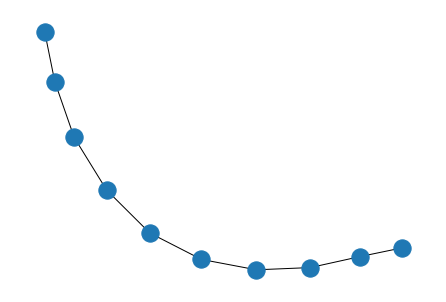

In [19]:
import matplotlib.pyplot as plt

G = nx.path_graph(10)
nx.draw(G)
# plt.savefig('chain_graph.pdf')
plt.show()

## Resources

* NetworkX Docs: Click [here](https://networkx.org/documentation/stable/reference/index.html) for the docs
* NetworkX Tutorial: Click [here](https://networkx.org/documentation/stable/tutorial.html) for some more NetworkX tutorial